In [13]:
from torch_geometric.datasets import BA2MotifDataset
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [2]:
dataset = BA2MotifDataset(root='data/BA2Motif')
dataset = dataset.shuffle()

In [3]:
data = dataset[9]

In [4]:
print(data.x )

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0

/Users/admin/Documents/Screenshots/LORE/.env/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


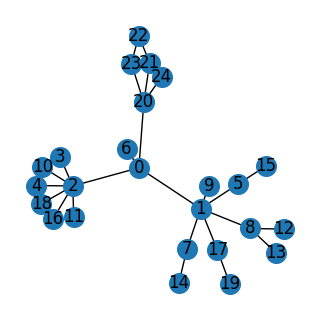

In [5]:
G = to_networkx(data, to_undirected=True)

plt.figure(figsize=(3, 3))
nx.draw(G, with_labels=True, cmap="coolwarm", node_size=200)
plt.show()

In [6]:
import torch
import pandas as pd
import numpy as np

@torch.no_grad()
def create_adjacency_matrix(edge_index, num_nodes):
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int) 
    edges = edge_index.cpu().numpy().T 
    
    for src, dst in edges:
        adj_matrix[src, dst] = 1  
        adj_matrix[dst, src] = 1  
    
    return adj_matrix

In [8]:
# import networkx as nx
# import matplotlib.pyplot as plt

# graph_idx = 0  # Chọn đồ thị đầu tiên
# graph_row = df.iloc[graph_idx]

# # Lấy các cột cạnh
# edge_columns = [col for col in df.columns if col.startswith('n')]
# edges = [(int(col.split('_')[0][1:]), int(col.split('_')[1][1:])) for col in edge_columns if graph_row[col] == 1]

# # Tạo đồ thị với NetworkX
# G = nx.Graph()
# G.add_edges_from(edges)

# # Vẽ đồ thị
# plt.figure(figsize=(6, 6))
# nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
# plt.show()


In [9]:
adj_matrix = create_adjacency_matrix(data.edge_index, data.num_nodes)
edge_index = data.edge_index.cpu().numpy().T
node_features = data.x.cpu().numpy()

In [ ]:
from genetic import genetic_graph_sampler

sampler = genetic_graph_sampler(adj_matrix, edge_index, node_features)

Generation 0: Best Fitness = 0.7314
Generation 10: Best Fitness = 0.7299
Generation 20: Best Fitness = 0.7299
Generation 30: Best Fitness = 0.7332
Generation 40: Best Fitness = 0.7299
Generation 50: Best Fitness = 0.7316
Generation 60: Best Fitness = 0.7332
Generation 70: Best Fitness = 0.7300
Generation 80: Best Fitness = 0.7316
Generation 90: Best Fitness = 0.7299
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

/Users/admin/Documents/Screenshots/LORE/genetic.py:191: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  x = torch.tensor([node_features[n] for n in nodes], dtype=torch.float)


In [28]:
graph = sampler[9]

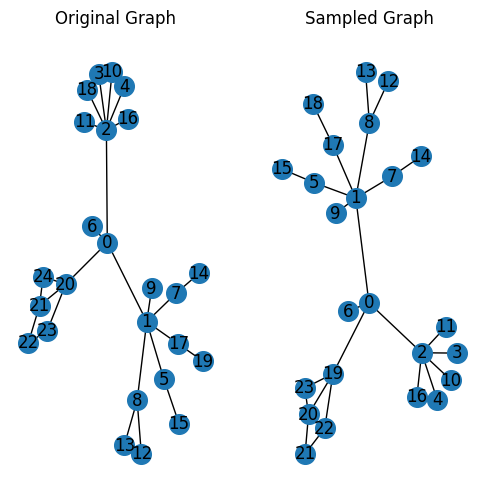

In [29]:
G = to_networkx(graph, to_undirected=True)
original_G = to_networkx(data, to_undirected=True)

plt.figure(figsize=(6, 6))
plt.subplot(121)
nx.draw(original_G, with_labels=True, cmap="coolwarm", node_size=200)
plt.title('Original Graph')
plt.subplot(122)
nx.draw(G, with_labels=True, cmap="coolwarm", node_size=200)
plt.title('Sampled Graph')
plt.show()


In [13]:
from model.gin import GIN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
model = GIN(
    in_channels=dataset.num_features,
    hidden_channels=32,
    out_channels=dataset.num_classes,
    num_layers=5,
).to(device)
model.load_state_dict(torch.load('model/model.pth'))
model.eval()

GIN(
  (convs): ModuleList(
    (0): GINConv(nn=MLP(10, 32, 32))
    (1-4): 4 x GINConv(nn=MLP(32, 32, 32))
  )
  (mlp): MLP(32, 32, 2)
)

In [14]:
from torch_geometric.data import Batch
@torch.no_grad()
def predict_single_graph(model, graph, device):
    model.eval()
    
    # Tạo batch giả (dù chỉ có 1 graph)
    graph.batch = torch.zeros(graph.x.size(0), dtype=torch.long)  # Tất cả node thuộc batch 0
    batch = Batch.from_data_list([graph]).to(device)

    # Forward qua mô hình
    out = model(batch.x, batch.edge_index, batch.batch, batch_size=1)
    
    # Lấy nhãn dự đoán
    predicted_label = out.argmax(dim=-1).item()
    
    return predicted_label

In [19]:
for graph in sampler:
    predicted_label = predict_single_graph(model, graph, device)
    print(f'Predicted label: {predicted_label}')

Predicted label: 0
Predicted label: 0
Predicted label: 0
Predicted label: 0
Predicted label: 1
Predicted label: 0
Predicted label: 0
Predicted label: 1
Predicted label: 1
Predicted label: 1


In [31]:
from torch_geometric.data import DataLoader

import torch
import pandas as pd


@torch.no_grad()
def get_mean_node_embeddings_df(loader):
    model.eval()
    all_graphs = []  
    labels = []
    edge_dicts = []

    for data in loader:
        data = data.to(device)
        _, node_embeddings = model(data.x, data.edge_index, data.batch, data.batch_size, return_embeddings=True)

        num_graphs = data.batch_size
        for i in range(num_graphs):
            mask = (data.batch == i)  
            node_indices = torch.where(mask)[0].cpu().numpy()
            mean_node_embedding = node_embeddings[mask].mean(dim=1).cpu().numpy()

            labels.append(data.y[i].item())
            all_graphs.append(mean_node_embedding.flatten().tolist())

            node_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(node_indices)}
            edges = data.edge_index[:, mask[data.edge_index[0]]].cpu().numpy().T
            edges_mapped = [(node_mapping[src], node_mapping[dst]) for src, dst in edges]

            # ma trận kề
            num_nodes = len(node_indices)
            adj_matrix = create_adjacency_matrix(torch.tensor(edges_mapped).T, num_nodes)

            # convert ma trận kề thành dict để concat vào DataFrame
            edge_dict = {f'n{r}_n{c}': adj_matrix[r, c] for r in range(num_nodes) for c in range(r, num_nodes)}
            edge_dicts.append(edge_dict)

    max_nodes = max(len(graph) for graph in all_graphs)
    embed_columns = [f'nE_{i+1}' for i in range(max_nodes)]
    df = pd.DataFrame(all_graphs, columns=embed_columns)

    df_edges = pd.DataFrame(edge_dicts).fillna(0).astype(int)  

    df = pd.concat([df, df_edges], axis=1)
    df['y'] = labels  

    return df


data_loader = DataLoader(dataset, batch_size=32, shuffle=False)
df = get_mean_node_embeddings_df(data_loader)
df[:5]

/Users/admin/Documents/Screenshots/LORE/.env/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


,nE_1,nE_2,nE_3,nE_4,nE_5,nE_6,nE_7,nE_8,nE_9,nE_10,...,n21_n22,n21_n23,n21_n24,n22_n22,n22_n23,n22_n24,n23_n23,n23_n24,n24_n24,y
0,0.000000,0.007290,0.024292,0.006632,0.006632,0.007290,0.008009,0.024292,0.006632,0.006632,...,1,0,1,0,1,0,0,0,0,1
1,0.015210,0.007753,0.007464,0.018019,0.109220,0.018019,0.027515,0.013557,0.014856,0.216001,...,1,0,0,0,1,0,0,1,0,0
2,0.008099,0.016002,0.007217,0.015137,0.013537,0.016002,0.017527,0.033101,0.016002,0.025818,...,1,0,0,0,1,0,0,1,0,0
3,0.010251,0.021832,0.070052,0.035720,0.057241,0.025610,0.026829,0.029337,0.025610,0.025610,...,1,0,0,0,1,0,0,1,0,0
4,0.001653,0.000000,0.007479,0.008140,0.023085,0.006801,0.006801,0.006801,0.007479,0.006801,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
import pickle
def load_graphs_from_pickle(filename = "graph2X.pkl"):
    with open(filename, "rb") as f:
        return pickle.load(f)

loaded_graphs = load_graphs_from_pickle("graph2X.pkl")


SystemError: () method: bad call flags

In [1]:
G = to_networkx(loaded_graphs, to_undirected=True)
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, cmap="coolwarm", node_size=200)
plt.show()

NameError: name 'to_networkx' is not defined

In [ ]:
import torch
import numpy as np
from torch_geometric.data import Data

def predict(self, reshaped_x, device, num_nodes):
    node_features = torch.tensor(reshaped_x[0, :num_nodes], dtype=torch.float).view(num_nodes, 1) 

    adj_flatten = reshaped_x[0, num_nodes:]  
    adj_matrix = np.zeros((num_nodes, num_nodes)) 
    triu_indices = np.triu_indices(num_nodes)  
    adj_matrix[triu_indices] = adj_flatten 

    adj_matrix = adj_matrix + adj_matrix.T - np.diag(np.diag(adj_matrix))

    edge_index = torch.nonzero(torch.tensor(adj_matrix, dtype=torch.long)).T  
    node_features = node_features.repeat(1,32) 
    print(node_features)
    batch = torch.zeros(num_nodes, dtype=torch.long) 
    
    data = Data(x=node_features, edge_index=edge_index, batch=batch)
    model = self.to(device)
    
    with torch.no_grad():
        data = data.to(device)
        output = model(data.x, data.edge_index, data.batch, batch_size=1)

    return output.argmax(dim=-1).cpu().numpy()  

In [37]:
index = 4

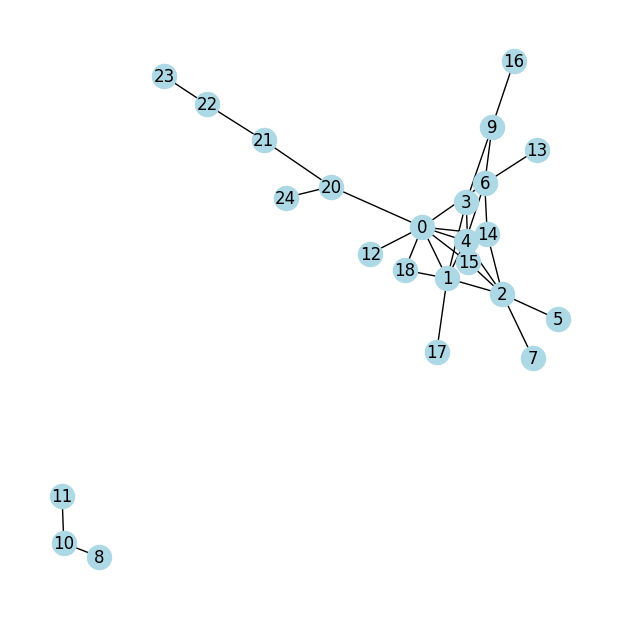

In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


file_path = "experiments/dfZ.csv"  
df = pd.read_csv(file_path)
df.drop(columns=['y'], inplace=True)
random_row = df.iloc[index]

nodes = 25 
adj_matrix_flat = random_row[26:].values.astype(float)
adj_matrix = np.zeros((nodes, nodes))

idx = 0
for i in range(nodes):
    for j in range(i, nodes):
        adj_matrix[i, j] = adj_matrix_flat[idx]
        adj_matrix[j, i] = adj_matrix_flat[idx] 
        idx += 1

G = nx.Graph()
for i in range(nodes):
    for j in range(i + 1, nodes):
        if adj_matrix[i, j] > 0: 
            G.add_edge(i, j)


plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300)
plt.show()
